# Analysing the Ted talk data

Founded in 1984 by Richard Saulman as a non profit organisation that aimed at bringing experts from the fields of Technology, Entertainment and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan and Bill Gates.

Ted, which operates under the slogan 'Ideas worth spreading' has managed to achieve an incredible feat of bringing world renowned experts from various walks of life and study and giving them a platform to distill years of their work and research into talks of 18 minutes in length. What's even more incredible is that their invaluable insights is available on the Internet for free.

Since the time we have begun watching TED Talks, they have never ceased to amaze us. We have learned an incredible amount, about fields we were completely alien to, in the form of poignant stories, breathtaking visuals and subtle humor. So in this notebook, we are attempting at finding insights about the world of TED, its speakers and its viewers and try to answer a few questions.

#### Features Available

   * name: The official name of the TED Talk. Includes the title and the speaker.
   * title: The title of the talk
   * description: A blurb of what the talk is about.
   * main_speaker: The first named speaker of the talk.
   * speaker_occupation: The occupation of the main speaker.
   * num_speaker: The number of speakers in the talk.
   * duration: The duration of the talk in seconds.
   * event: The TED/TEDx event where the talk took place.
   * film_date: The Unix timestamp of the filming.
   * published_date: The Unix timestamp for the publication of the talk on TED.com
   * comments: The number of first level comments made on the talk.
   * tags: The themes associated with the talk.
   * languages: The number of languages in which the talk is available.
   * ratings: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
   * related_talks: A list of dictionaries of recommended talks to watch next.
   * url: The URL of the talk.
   * views: The number of views on the talk.
 

## Loading and reading the data

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb

In [23]:
data = pd.read_csv("C:\\Users\\DELL\\Basecamp3\\GLabs_Data_Science_Learn\\Ted data analysis\\data\\ted.csv")
data.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,25-02-2006,27-06-2006,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,24-02-2006,27-06-2006,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,26-02-2006,27-06-2006,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,22-02-2006,28-06-2006,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [24]:
data.shape

(2550, 17)

In [25]:
data.columns

Index(['name', 'title', 'description', 'main_speaker', 'speaker_occupation',
       'num_speaker', 'duration', 'event', 'film_date', 'published_date',
       'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url',
       'views'],
      dtype='object')

In [26]:
data.describe()

,num_speaker,duration,comments,languages,views
count,2550.000000,2550.000000,2550.000000,2550.000000,2.550000e+03
mean,1.028235,826.510196,191.562353,27.326275,1.698297e+06
std,0.207705,374.009138,282.315223,9.563452,2.498479e+06
min,1.000000,135.000000,2.000000,0.000000,5.044300e+04
25%,1.000000,577.000000,63.000000,23.000000,7.557928e+05
50%,1.000000,848.000000,118.000000,28.000000,1.124524e+06
75%,1.000000,1046.750000,221.750000,33.000000,1.700760e+06
max,5.000000,5256.000000,6404.000000,72.000000,4.722711e+07


In [27]:
data.columns

Index(['name', 'title', 'description', 'main_speaker', 'speaker_occupation',
       'num_speaker', 'duration', 'event', 'film_date', 'published_date',
       'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url',
       'views'],
      dtype='object')

## Which are the top 15 most viewed talks of all time? 

In [28]:
sorted_data = data.sort_values(by=['views'], ascending=False)
dp= sorted_data.head(15)
dp

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1346,Amy Cuddy: Your body language may shape who yo...,Your body language may shape who you are,"Body language affects how others see us, but i...",Amy Cuddy,Social psychologist,1,1262,TEDGlobal 2012,26-06-2012,01-10-2012,2290,"['body language', 'brain', 'business', 'psycho...",51,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 605, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/amy_cuddy_your_body_...,43155405
677,Simon Sinek: How great leaders inspire action,How great leaders inspire action,Simon Sinek has a simple but powerful model fo...,Simon Sinek,Leadership expert,1,1084,TEDxPuget Sound,17-09-2009,04-05-2010,1930,"['TEDx', 'business', 'entrepreneur', 'leadersh...",45,"[{'id': 21, 'name': 'Unconvincing', 'count': 9...","[{'id': 814, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/simon_sinek_how_grea...,34309432
837,Brené Brown: The power of vulnerability,The power of vulnerability,Brené Brown studies human connection -- our ab...,Brené Brown,Vulnerability researcher,1,1219,TEDxHouston,06-06-2010,23-12-2010,1927,"['TEDx', 'communication', 'culture', 'depressi...",52,"[{'id': 10, 'name': 'Inspiring', 'count': 2144...","[{'id': 1391, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/brene_brown_on_vulne...,31168150
452,Mary Roach: 10 things you didn't know about or...,10 things you didn't know about orgasm,"""Bonk"" author Mary Roach delves into obscure s...",Mary Roach,Writer,1,1003,TED2009,06-02-2009,20-05-2009,354,"['books', 'culture', 'history', 'humor', 'scie...",37,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 16, 'hero': 'https://pe.tedcdn.com/ima...",https://www.ted.com/talks/mary_roach_10_things...,22270883
1776,Julian Treasure: How to speak so that people w...,How to speak so that people want to listen,"Have you ever felt like you're talking, but no...",Julian Treasure,Sound consultant,1,598,TEDGlobal 2013,10-06-2013,27-06-2014,297,"['culture', 'sound', 'speech']",45,"[{'id': 24, 'name': 'Persuasive', 'count': 267...","[{'id': 1200, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/julian_treasure_how_...,21594632
201,Jill Bolte Taylor: My stroke of insight,My stroke of insight,Jill Bolte Taylor got a research opportunity f...,Jill Bolte Taylor,Neuroanatomist,1,1099,TED2008,27-02-2008,12-03-2008,2877,"['biology', 'brain', 'consciousness', 'global ...",49,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
5,Tony Robbins: Why we do what we do,Why we do what we do,"Tony Robbins discusses the ""invisible forces"" ...",Tony Robbins,Life coach; expert in leadership psychology,1,1305,TED2006,02-02-2006,28-06-2006,672,"['business', 'culture', 'entertainment', 'goal...",36,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/tony_robbins_asks_wh...,20685401
2114,James Veitch: This is what happens when you re...,This is what happens when you reply to spam email,"Suspicious emails: unclaimed insurance bonds, ...",James Veitch,Comedian and writer,1,588,TEDGlobal>Geneva,08-12-2015,08-01-2016,150,"['comedy', 'communication', 'curiosity', 'humo...",43,"[{'id': 7, 'name': 'Funny', 'count': 7731}, {'...","[{'id': 2236, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/james_veitch_t

In [29]:
sorted_data['name'].iloc[0:15,]

0               Ken Robinson: Do schools kill creativity?
1346    Amy Cuddy: Your body language may shape who yo...
677         Simon Sinek: How great leaders inspire action
837               Brené Brown: The power of vulnerability
452     Mary Roach: 10 things you didn't know about or...
1776    Julian Treasure: How to speak so that people w...
201               Jill Bolte Taylor: My stroke of insight
5                      Tony Robbins: Why we do what we do
2114    James Veitch: This is what happens when you re...
1416    Cameron Russell: Looks aren't everything. Beli...
500                    Dan Pink: The puzzle of motivation
1163                  Susan Cain: The power of introverts
1036                     Pamela Meyer: How to spot a liar
2109    Robert Waldinger: What makes a good life? Less...
1129         Shawn Achor: The happy secret to better work
Name: name, dtype: object

In [30]:
sorted_data.columns

Index(['name', 'title', 'description', 'main_speaker', 'speaker_occupation',
       'num_speaker', 'duration', 'event', 'film_date', 'published_date',
       'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url',
       'views'],
      dtype='object')

In [31]:
top15 = sorted_data[['title','main_speaker','published_date', 'views']].iloc[0:15,:]
top15

,title,main_speaker,published_date,views
0,Do schools kill creativity?,Ken Robinson,27-06-2006,47227110
1346,Your body language may shape who you are,Amy Cuddy,01-10-2012,43155405
677,How great leaders inspire action,Simon Sinek,04-05-2010,34309432
837,The power of vulnerability,Brené Brown,23-12-2010,31168150
452,10 things you didn't know about orgasm,Mary Roach,20-05-2009,22270883
1776,How to speak so that people want to listen,Julian Treasure,27-06-2014,21594632
201,My stroke of insight,Jill Bolte Taylor,12-03-2008,21190883
5,Why we do what we do,Tony Robbins,28-06-2006,20685401
2114,This is what happens when you reply to spam email,James Veitch,08-01-2016,20475972
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,16-01-2013,19787465


<AxesSubplot:xlabel='main_speaker', ylabel='views'>

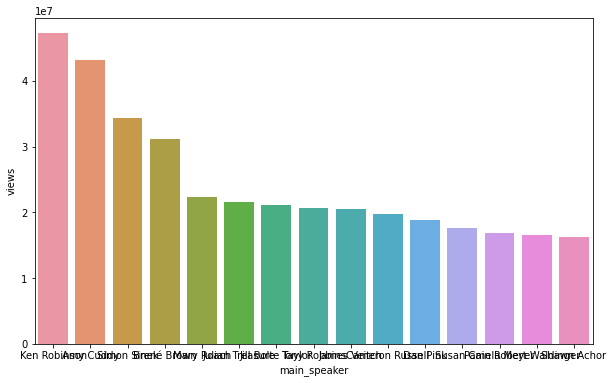

In [32]:
fig= plt.figure(figsize=(10,6))
snb.barplot(x="main_speaker", y="views", data=top15)

<AxesSubplot:xlabel='views', ylabel='main_speaker'>

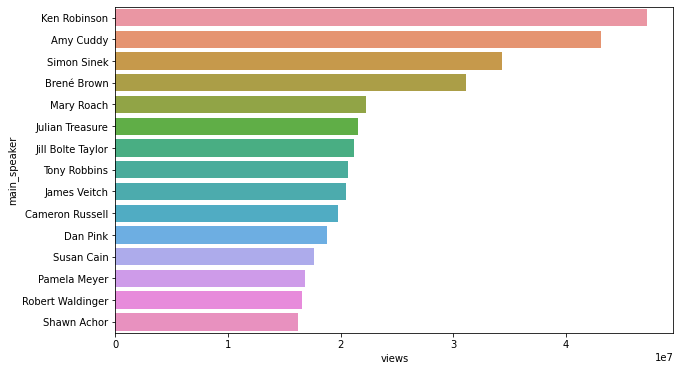

In [33]:
fig= plt.figure(figsize=(10,6))
snb.barplot(x="views", y="main_speaker", data=top15)

## Find out the distribution and summary statistics of views and comments

In [34]:
data.columns

Index(['name', 'title', 'description', 'main_speaker', 'speaker_occupation',
       'num_speaker', 'duration', 'event', 'film_date', 'published_date',
       'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url',
       'views'],
      dtype='object')

In [35]:
data.describe()

,num_speaker,duration,comments,languages,views
count,2550.000000,2550.000000,2550.000000,2550.000000,2.550000e+03
mean,1.028235,826.510196,191.562353,27.326275,1.698297e+06
std,0.207705,374.009138,282.315223,9.563452,2.498479e+06
min,1.000000,135.000000,2.000000,0.000000,5.044300e+04
25%,1.000000,577.000000,63.000000,23.000000,7.557928e+05
50%,1.000000,848.000000,118.000000,28.000000,1.124524e+06
75%,1.000000,1046.750000,221.750000,33.000000,1.700760e+06
max,5.000000,5256.000000,6404.000000,72.000000,4.722711e+07


In [36]:
data['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

In [37]:
data['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

<AxesSubplot:ylabel='Density'>

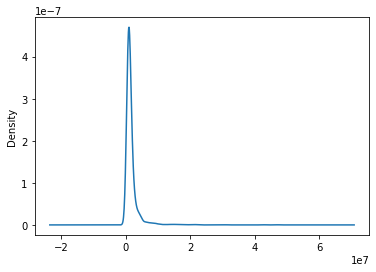

In [38]:
data['views'].plot.density()

<AxesSubplot:ylabel='Density'>

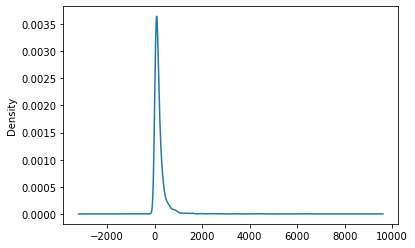

In [39]:
data['comments'].plot.density()

In [40]:
data.corr()

,num_speaker,duration,comments,languages,views
num_speaker,1.000000,0.022257,-0.035489,-0.063100,-0.026389
duration,0.022257,1.000000,0.140694,-0.295681,0.048740
comments,-0.035489,0.140694,1.000000,0.318284,0.530939
languages,-0.063100,-0.295681,0.318284,1.000000,0.377623
views,-0.026389,0.048740,0.530939,0.377623,1.000000


In [41]:
data[['views','comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


In [63]:
data[['views','comments']].corr().plot.scatter()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

<AxesSubplot:xlabel='views', ylabel='comments'>

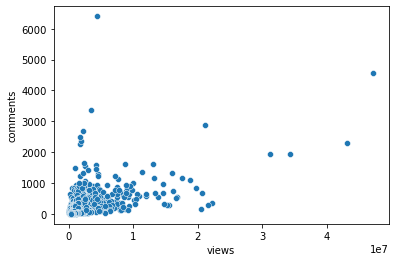

In [64]:
snb.scatterplot(data=data, x="views", y="comments")

## Is there any co-relation between views and comments?

## Let us now check the number of views and comments on the 10 most commented TED Talks of all time. What are your observations?

In [65]:
x = data.sort_values(by='comments', ascending =False)[:10]

In [66]:
x[['views', 'comments']]

,views,comments
96,4374792,6404
0,47227110,4553
644,3433437,3356
201,21190883,2877
1787,2162764,2673
954,1832930,2492
840,1847256,2374
1346,43155405,2290
661,1838628,2272
677,34309432,1930


In [67]:
x[['name','views', 'comments']]

,name,views,comments
96,Richard Dawkins: Militant atheism,4374792,6404
0,Ken Robinson: Do schools kill creativity?,47227110,4553
644,Sam Harris: Science can answer moral questions,3433437,3356
201,Jill Bolte Taylor: My stroke of insight,21190883,2877
1787,David Chalmers: How do you explain consciousness?,2162764,2673
954,Janet Echelman: Taking imagination seriously,1832930,2492
840,Lesley Hazleton: On reading the Koran,1847256,2374
1346,Amy Cuddy: Your body language may shape who yo...,43155405,2290
661,Michael Specter: The danger of science denial,1838628,2272
677,Simon Sinek: How great leaders inspire action,34309432,1930


## Which talks tend to attract the largest amount of discussion?


In [75]:
data['engagementRatio']= data.apply(lambda row: row['comments'] / row['views'], axis=1)

In [79]:
data['engagementRatio1']= data['comments'] / data['views']
data['engagementRatio1']

0       0.000096
1       0.000083
2       0.000076
3       0.000118
4       0.000049
          ...   
2545    0.000038
2546    0.000014
2547    0.000027
2548    0.000076
2549    0.000020
Name: engagementRatio1, Length: 2550, dtype: float64

In [85]:
data.sort_values('engagementRatio', ascending=False)

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views,x,engagementRatio,engagementRatio1
744,Diane J. Savino: The case for same-sex marriage,The case for same-sex marriage,Hours before New York lawmakers rejected a key...,Diane J. Savino,Senator,1,453,New York State Senate,02-12-2009,17-08-2010,649,"['God', 'LGBT', 'culture', 'government', 'law'...",0,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/diane_j_savino_the_c...,292395,450.531587,0.002220,0.002220
803,David Bismark: E-voting without fraud,E-voting without fraud,David Bismark demos a new system for voting th...,David Bismark,Voting system designer,1,422,TEDGlobal 2010,14-07-2010,02-11-2010,834,"['culture', 'democracy', 'design', 'global iss...",36,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/david_bismark_e_voti...,543551,651.739808,0.001534,0.001534
96,Richard Dawkins: Militant atheism,Militant atheism,Richard Dawkins urges all atheists to openly s...,Richard Dawkins,Evolutionary biologist,1,1750,TED2002,02-02-2002,16-04-2007,6404,"['God', 'atheism', 'culture', 'religion', 'sci...",42,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",https://www.ted.com/talks/richard_dawkins_on_m...,4374792,683.134291,0.001464,0.001464
694,Sharmeen Obaid-Chinoy: Inside a school for sui...,Inside a school for suicide bombers,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,Sharmeen Obaid-Chinoy,Filmmaker,1,489,TED2010,10-02-2010,26-05-2010,1502,"['TED Fellows', 'children', 'culture', 'film',...",32,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,703.886818,0.001421,0.001421
954,Janet Echelman: Taking imagination seriously,Taking imagination seriously,Janet Echelman found her true voice as an arti...,Janet Echelman,Artist,1,566,TED2011,03-03-2011,08-06-2011,2492,"['art', 'cities', 'culture', 'data', 'design',...",35,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/janet_echelman\n,1832930,735.525682,0.001360,0.001360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,Jimmy Lin: A simple new blood test that can ca...,A simple new blood test that can catch cancer ...,Jimmy Lin is developing technologies to catch ...,Jimmy Lin,Geneticist,1,730,TED2017,24-04-2017,25-07-2017,7,"['DNA', 'TED Fellows', 'biology', 'cancer', 'd...",10,"[{'id': 1, 'name': 'Beautiful', 'count': 7}, {...","[{'id': 2498, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/jimmy_lin_a_simple_n...,1005506,143643.714286,0.000007,0.000007
2528,Chance Coughenour: How your pictures can help ...,How your pictures can help reclaim lost history,Digital archaeologist Chance Coughenour is usi...,Chance Coughenour,Digital archaeologist,1,717,TEDxHamburg,08-06-2016,01-09-2017,3,"['TEDx', 'ancient world', 'archaeology', 'cons...",5,"[{'id': 9, 'name': 'Ingenious', 'count': 16}, ...","[{'id': 2673, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/chance_coughenour_ho...,539207,179735.666667,0.000006,0.000006
2542,Sethembile Msezane: Living sculptures that sta...,Living sculptures that stand for history's truths,In the century-old statues that occupy Cape To...,Sethembile Msezane,Artist,1,795,TEDGlobal 2017,27-08-2017,15-09-2017,3,"['Africa', 'activism', 'art', 'community', 'hi...",1,"[{'id': 1, 'name': 'Beautiful', 'count': 41}, ...","[{'id': 2873, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/sethembile_msezane_l...,542088,180696.000000,0.000006,0.000006
2501,Françoise Mouly: The stories behind The New Yo...,The stories behind The Ne

In [74]:
data['x']=data['views']/data['comments']

In [73]:
data['x']

0       4553
1        265
2        124
3        200
4        593
        ... 
2545      17
2546       6
2547      10
2548      32
2549       8
Name: x, Length: 2550, dtype: int64

## Who are the top speakers?

<AxesSubplot:>

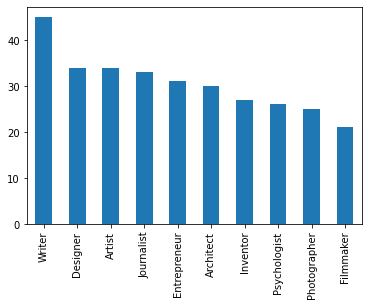

In [89]:
data['speaker_occupation'].value_counts()[:10].plot(kind='bar')

In [90]:
snb.barplot(x='speaker_occupation', data=data)

TypeError: Horizontal orientation requires numeric `x` variable.

## Which occupation should you choose if you want to become a TED Speaker? Let us have a look what kind of people TED is most interested in inviting to its events.

## Do some professions tend to attract a larger number of viewers? 


In [107]:
c = data.groupby('speaker_occupation')['views'].sum().sort_values(ascending=False)


In [108]:
c

speaker_occupation
Writer                         133549303
Psychologist                    90851398
Author/educator                 63006281
Entrepreneur                    61764022
Social psychologist             56813602
                                 ...    
Industrial Designer               132199
Civic thought leader              125050
Professor of music                117756
Economist, techno-activist        115346
Contemporary music ensemble        66668
Name: views, Length: 1458, dtype: int64

## Convert the duration column in minutes, find the details of the longest and shortest Ted talks in terms of duration.

In [120]:
data['durationMin']= data['duration']/60
data

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,tags,languages,ratings,related_talks,url,views,x,engagementRatio,engagementRatio1,durationMin
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,...,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,10372.745443,0.000096,0.000096,19.400000
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,25-02-2006,27-06-2006,...,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520,12077.433962,0.000083,0.000083,16.283333
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,24-02-2006,27-06-2006,...,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292,13195.903226,0.000076,0.000076,21.433333
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,26-02-2006,27-06-2006,...,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550,8487.750000,0.000118,0.000118,18.600000
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,22-02-2006,28-06-2006,...,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869,20245.984823,0.000049,0.000049,19.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,Duarte Geraldino: What we're missing in the de...,What we're missing in the debate about immigra...,"Between 2008 and 2016, the United States depor...",Duarte Geraldino,Journalist,1,476,TED2017,06-06-2017,20-09-2017,...,"['TED Residency', 'United States', 'community'...",4,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/duarte_geraldino_wha...,450430,26495.882353,0.000038,0.000038,7.933333
2546,Armando Azua-Bustos: The most Martian place on...,The most Martian place on Earth,How can you study Mars without a spaceship? He...,Armando Azua-Bustos,Astrobiologist,1,290,TED2017,24-04-2017,20-09-2017,...,"['Mars', 'South America', 'TED Fellows', 'astr...",3,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/armando_azua_bustos_...,417470,69578.333333,0.000014,0.000014,4.833333
2547,Radhika Nagpal: What intelligent machines can ...,What intelligent machines can learn from a sch...,Science fiction visions of the future show us ...,Radhika Nagpal,Robotics engineer,1,651,TED2017,24-04-2017,21-09-2017,...,"['AI', 'ants', 'fish', 'future', 'innovation',...",1,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/radhika_nagpal_what_...,375647,37564.700000,0.000027,0.000027,10.850000
2548,Theo E.J. Wi

In [125]:
data.sort_values(by=data['durationMin', ascending = False])

SyntaxError: invalid syntax (<ipython-input-125-ae08dab693c1>, line 1)

## Have a look at the data, what questions apart from the one discussed come in your mind?
## Try answering the questions on your own.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
import datetime

%matplotlib inline
sns.set_style("whitegrid")

plt.style.use("fivethirtyeight")